In [16]:
import numpy as np
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [18]:
## preprocessing data
data = pd.read_csv('stroke.CSV')
required_fields = ['RCONSC', 'SEX', 'AGE', 'RSLEEP', 'RATRIAL', 'RVISINF', 'RSBP', 'RDEF1', 'RDEF2', 'RDEF3',
                   'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK']
data = data[required_fields]
data.dropna() # dropping fields with NA values or Empty Values

data_d = pd.get_dummies(data)
x = data_d.loc[:, 'AGE':'STYPE_TACS'].values # INPUT DATA READY

## PREPARING OUTPUT ARRAY
data = pd.read_csv('predictstrokedata.csv')
output_data = data[['DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK']] # REQUIRED FIELDS
output_data = output_data.values
stroke_type=[] # empty array to store final values
for row in output_data:
    row = list(row)
    try:
        stroke_type.append(row.index('Y'))
    except:
        stroke_type.append(-1)
y = stroke_type

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

#classifiers
classifiers = [
    ("NN", KNeighborsClassifier(3)),
    ("LSVM", SVC(kernel="linear", C=0.025)),
    ("RBFSVM", SVC(gamma=2, C=1)),
    
    ("DT", DecisionTreeClassifier(max_depth=5)),
    ("RF", RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    ("MLP", MLPClassifier(alpha=1)),
    ("AB", AdaBoostClassifier()),
    ("NB", GaussianNB()),
    ("QDA", QuadraticDiscriminantAnalysis())
]
names=[]
results = {
        'accuracy': [],
        'training_time': [],
        'testing_time': []
}
seed = 7

#trianing
for classifier, clf in classifiers:
    print("-" * 5)
    print ("starting training ", classifier)
    names.append(classifier)
    start_time = timeit.default_timer()
    model = clf.fit(x_train, y_train)
    tr_time=(timeit.default_timer() - start_time)
    print ("training completed in %s seconds"  %tr_time)
    results['training_time'].append(tr_time)

        #testing
    print("starting testing")
    start_time = timeit.default_timer()
    acc=model.score(x_test, y_test) * 100;
    print("Accuracy: %s percent" %acc)
    testtime=(timeit.default_timer() - start_time);
    print("testing completed in %s seconds"  %testtime )
    results['testing_time'].append(testtime)
    results['accuracy'].append(acc)
results


C:\Users\Abin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


-----
starting training  NN
training completed in 0.038722520072042244 seconds
starting testing
Accuracy: 88.52683930715143 percent
testing completed in 0.2848450385572505 seconds
-----
starting training  LSVM
training completed in 5.63796365624512 seconds
starting testing
Accuracy: 89.60727148002057 percent
testing completed in 0.6624906123724941 seconds
-----
starting training  RBFSVM
training completed in 183.93754155759598 seconds
starting testing
Accuracy: 89.05848053507117 percent
testing completed in 7.936169047883595 seconds
-----
starting training  DT
training completed in 0.028859329271654133 seconds
starting testing
Accuracy: 89.55582232893158 percent
testing completed in 0.0023723462109046523 seconds
-----
starting training  RF
training completed in 0.03163568797390326 seconds
starting testing
Accuracy: 89.60727148002057 percent
testing completed in 0.0072975227230926976 seconds
-----
starting training  MLP
training completed in 1.0454683958414535 seconds
starting testing
A

C:\Users\Abin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


{'accuracy': [88.52683930715143,
  89.60727148002057,
  89.05848053507117,
  89.55582232893158,
  89.60727148002057,
  89.60727148002057,
  89.52152289487223,
  0.7888869833647745,
  4.304578974446922],
 'testing_time': [0.2848450385572505,
  0.6624906123724941,
  7.936169047883595,
  0.0023723462109046523,
  0.0072975227230926976,
  0.007501039293856593,
  0.052935830357455416,
  0.01408644281400484,
  0.017827145333285443],
 'training_time': [0.038722520072042244,
  5.63796365624512,
  183.93754155759598,
  0.028859329271654133,
  0.03163568797390326,
  1.0454683958414535,
  0.7088361306487059,
  0.014058124183065956,
  0.029324887585971737]}

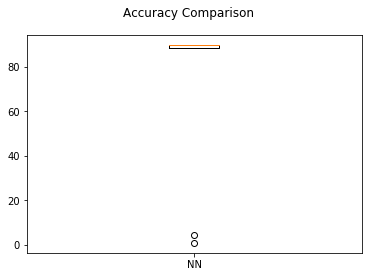

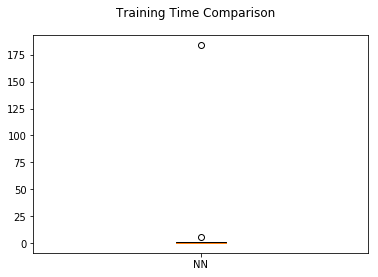

['NN', 'LSVM', 'RBFSVM', 'DT', 'RF', 'MLP', 'AB', 'NB', 'QDA']

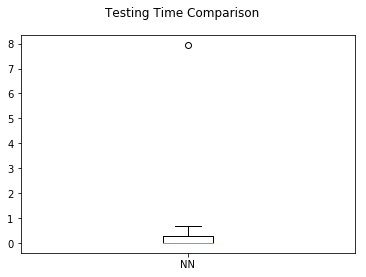

In [20]:
# accuracy chart
fig = plt.figure()
fig.suptitle('Accuracy Comparison')
ax = fig.add_subplot(111)      
plt.boxplot(results['accuracy'])
ax.set_xticklabels(names)

# precision chart
fig = plt.figure()
fig.suptitle('Training Time Comparison')
ax = fig.add_subplot(111)      
plt.boxplot(results['training_time'])
ax.set_xticklabels(names)
plt.show()

#average precision
fig = plt.figure()
fig.suptitle('Testing Time Comparison')
ax = fig.add_subplot(111)      
plt.boxplot(results['testing_time'])
ax.set_xticklabels(names)

names

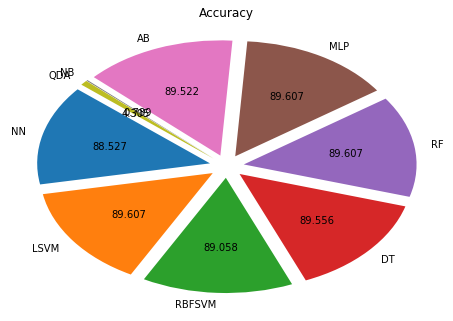

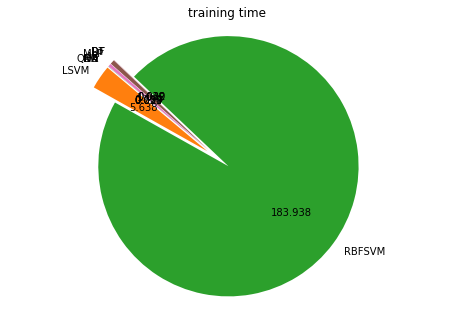

In [63]:
#accuracy
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1)
total=sum(results['accuracy'])
plt.title('Accuracy')
plt.subplots_adjust(1,1,2,2)
plt.pie(results['accuracy'] ,explode=explode, labels=names,autopct=lambda p:'{:.3f}'.format(p * total / 100), startangle=140)
plt.show()

#testing time
total=sum(results['training_time'])
plt.title('training time')
plt.subplots_adjust(1,1,2,2)
plt.pie(results['training_time'] ,explode=explode, labels=names,autopct=lambda p:'{:.3f}'.format(p * total / 100), startangle=140)
plt.axis('equal')
plt.show()

<Container object of 9 artists>

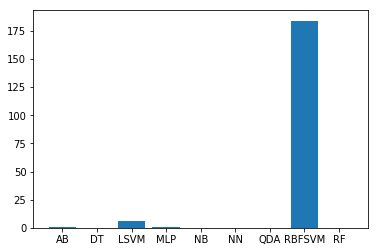

In [37]:
ax = plt.subplot(111)
ax.bar(names,results['training_time'])